# NO2 PREDICTION


## Import Library

In [54]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

## Loading Manually Pre-processed Italy Dataset

In [ ]:
manual_preprocessed_italy_data = pd.read_excel('../Preprocessed Data/manual_preprocessed_italy_air_quality_data.xlsx')

In [ ]:
(df[['Time', 'CO(GT)','PT08.S1(CO)', 'NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']] == -200).sum()

In [ ]:
model=LinearRegression()

In [58]:
x=manual_preprocessed_italy_data[['Time', 'CO(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','AH']]

y= manual_preprocessed_italy_data['RH']

In [59]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42)

In [60]:
model.fit(x_train,y_train)

LinearRegression()

In [62]:
prediction = model.predict(x_test)

<Axes: xlabel='RH'>

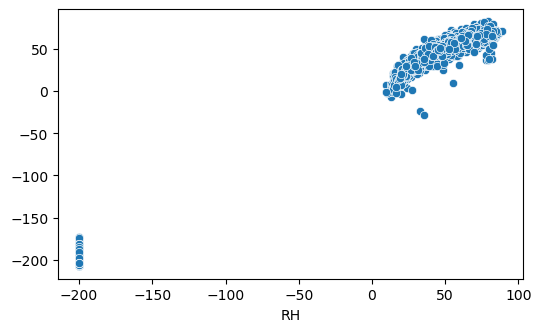

In [70]:
fig_dims = (6,3.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x=y_test, y=prediction, ax=ax)

In [63]:
print('accuracy of your prediction are',end=' ')
print(r2_score(y_test,prediction)*100,end='')
print('%')

accuracy of your prediction are 97.4882672014979%


In [67]:
filename ='../Saved Models/no2_prediction_model.sav'

pickle.dump(model, open(filename, 'wb'))